<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [56]:
# Librerias a importar
import os
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

#Definicion de directorio para almacenar imagenes
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Cargar el dataset
lfw_people = fetch_lfw_people(min_faces_per_person=25, resize=0.4)


In [57]:
#Extraccion de imagenes por nombre de persona
for i, (image, label) in enumerate(zip(lfw_people.images, lfw_people.target)):
    person_name = lfw_people.target_names[label]
    person_dir = os.path.join(data_dir, person_name)
    if not os.path.exists(person_dir):
        os.makedirs(person_dir)
    
    # Guardar la imagen
    img = Image.fromarray((image * 255).astype(np.uint8))  # Convertir a uint8 para guardar
    img.save(os.path.join(person_dir, f'image_{i}.png'))

print("Las imágenes han sido guardadas en la carpeta 'data'.")


Las imágenes han sido guardadas en la carpeta 'data'.


Usamos la libreria fetch_lfw_people para cargar los datos de las imagenes de caras de personas. Creamos un directorio llamado "data", en caso de no existir, con el fin de almacenar nuestras fotos. Luego traemos las fotos de personas que tengan al menos 25 fotos en el set de datos. Luego reccorremos el set de datos y para cada individuo se crea una subcarpeta dentro de "data" con las fotos correspondientes de este individuo.

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [58]:
# Utilice este espacio para escribir el código.
n_samples, h, w = lfw_people.images.shape
n_classes = len(lfw_people.target_names)

print(f"Número total de imágenes: {n_samples}")
print(f"Dimensiones de cada imagen: {h} x {w}")
print(f"Número de personas distintas: {n_classes}")
print(f"Ejemplos de nombres de personas: {lfw_people.target_names[:10]}")


Número total de imágenes: 2588
Dimensiones de cada imagen: 50 x 37
Número de personas distintas: 42
Ejemplos de nombres de personas: ['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Bill Clinton' 'Colin Powell' 'David Beckham'
 'Donald Rumsfeld' 'George W Bush']


Usamos el modulo shape sobre lfw_people para obtener informacion del dataset. Extraemos el numero total de imagenes, las dimensiones de cada imagen y la cantidad de personas que tenemos en nuestro dataset.

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

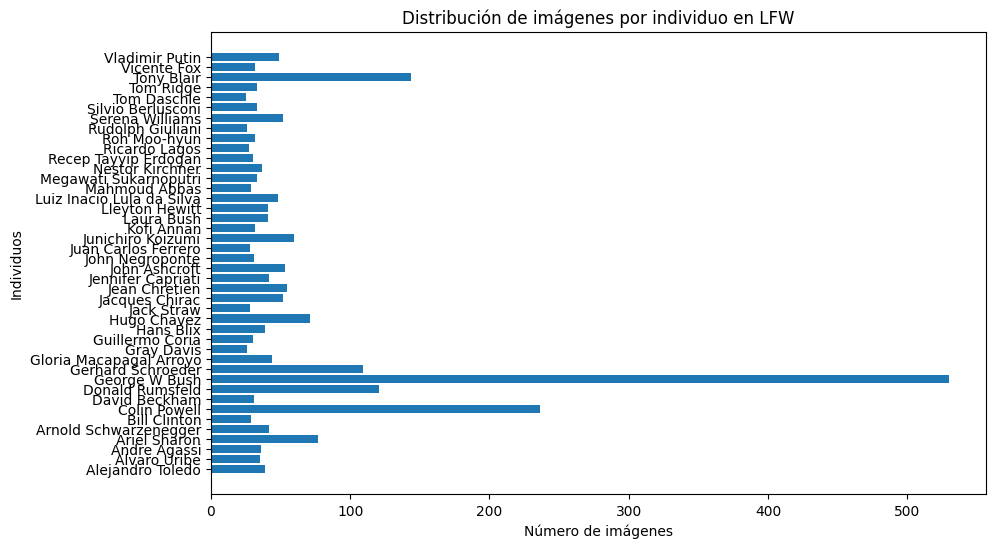

In [59]:
# Obtener las etiquetas de las imágenes
labels = lfw_people.target

# Contar el número de imágenes por individuo
(unique, counts) = np.unique(labels, return_counts=True)

# Crear un diccionario con nombres y conteos
distribution = dict(zip(lfw_people.target_names[unique], counts))

# Graficar la distribución
plt.figure(figsize=(10, 6))
plt.barh(lfw_people.target_names[unique], counts)
plt.xlabel('Número de imágenes')
plt.ylabel('Individuos')
plt.title('Distribución de imágenes por individuo en LFW')
plt.show()


Podemos observar que los individuos que mas fotos tienen son George W bush, seguido por Colin Powell y eTony Blair. 

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Número de imágenes de Serena Williams: 52


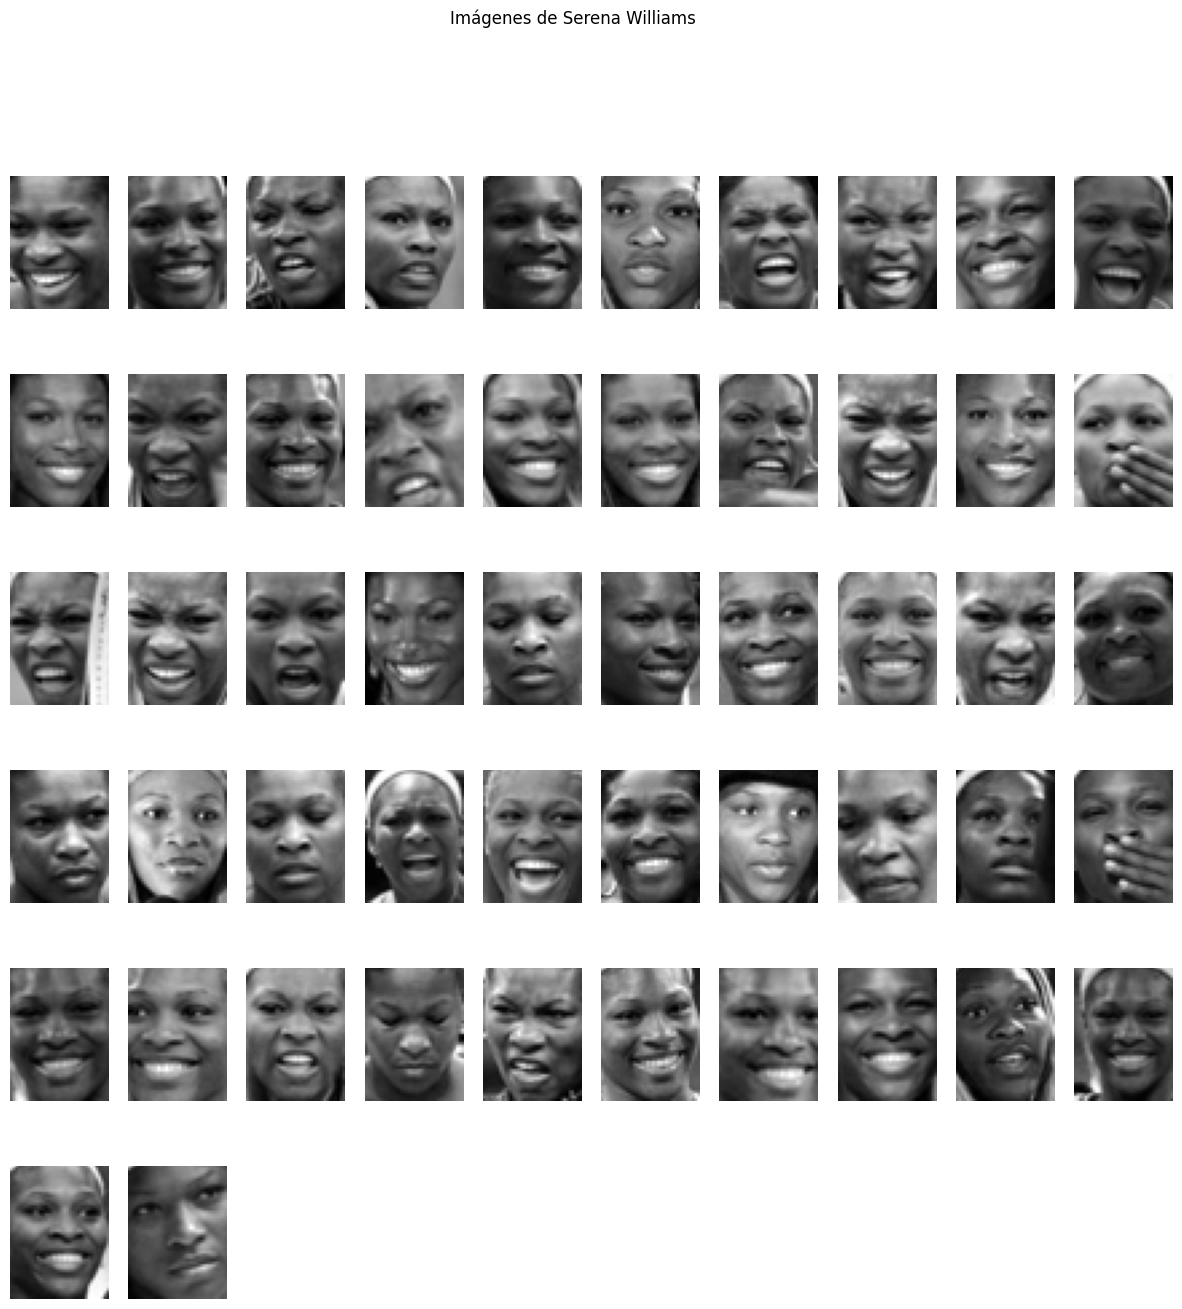

In [60]:
# Encontrar el índice de Serena Williams en el array target_names
serena_index = list(lfw_people.target_names).index("Serena Williams")

# Filtrar las imágenes que pertenecen a Serena Williams
serena_images = lfw_people.images[lfw_people.target == serena_index]

# Contar el número de imágenes
num_images = serena_images.shape[0]
print(f"Número de imágenes de Serena Williams: {num_images}")

# Establecer el número de columnas
num_cols = 10
num_rows = (num_images // num_cols) + int(num_images % num_cols != 0)

# Graficar las imágenes
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(serena_images[i], cmap='gray')
    plt.axis('off')

plt.suptitle('Imágenes de Serena Williams')
plt.show()


En total contamos con 53 imagenes de Serena Williams. Para obtener las fotas se identifico el indice que corresponde a Serena Williams y se filtraron las imagenes usando este indice para finalmente graficar todas las imegenes.

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

In [61]:
#Aplasto los datos para poder trabajar "mas intuitivamente" con las matrices
X = lfw_people.data
X = pd.DataFrame(X)

y = lfw_people.target
y = pd.DataFrame(y, columns=['pid']) # pid is person_id

df = y.join(X)
df.head()

,pid,0,1,2,3,4,5,6,7,8,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
0,10,0.162092,0.200000,0.226144,0.309804,0.406536,0.448366,0.433987,0.435294,0.423529,...,0.125490,0.126797,0.134641,0.139869,0.151634,0.158170,0.164706,0.175163,0.179085,0.186928
1,9,0.201307,0.220915,0.252288,0.281046,0.304575,0.329412,0.358170,0.386928,0.411765,...,0.271895,0.386928,0.580392,0.848366,0.938562,0.901961,0.892810,0.926797,0.864052,0.661438
2,41,0.372549,0.400000,0.541176,0.633987,0.648366,0.687582,0.691503,0.700654,0.728105,...,0.990850,0.989542,0.989542,1.000000,0.678431,0.101961,0.086275,0.090196,0.094118,0.090196
3,6,0.718954,0.681046,0.511111,0.407843,0.490196,0.648366,0.734641,0.759477,0.801307,...,0.232680,0.311111,0.359477,0.390850,0.447059,0.458824,0.482353,0.508497,0.240523,0.052288
4,9,0.375163,0.486275,0.611765,0.681046,0.664052,0.590850,0.547712,0.525490,0.525490,...,0.048366,0.054902,0.049673,0.074510,0.083660,0.092810,0.044444,0.067974,0.078431,0.082353


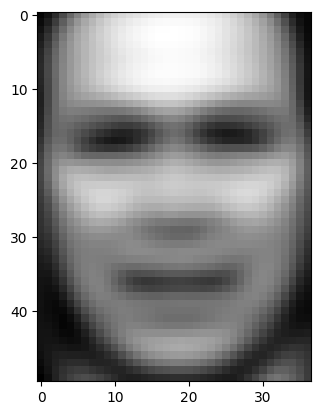

In [62]:
Xmean = df.drop(columns=[ 'pid']).mean(axis=0)
plt.imshow(Xmean.to_numpy().reshape((h, w)), cmap=plt.cm.gray)

Primero transformamos en un dataframe el set de datos originales para facilitar el manejo de los datos. Se transforman los datos de un Numphy array a un DataFrame Pandas el cual tiene el indice del ID de la persona a la que corresponde la foto y en la fila los datos de la imagen correspondiente. Seguidamente procedemos a realizar el calculo del promedio de cada columna para nuestro dataframe, entendiendo que cada columna representa el mismo pixel en cada foto. Ya con el nuevo dataframe de valores pormedio de cada pixel (columna) podemos graficar el rostro promedio. 

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

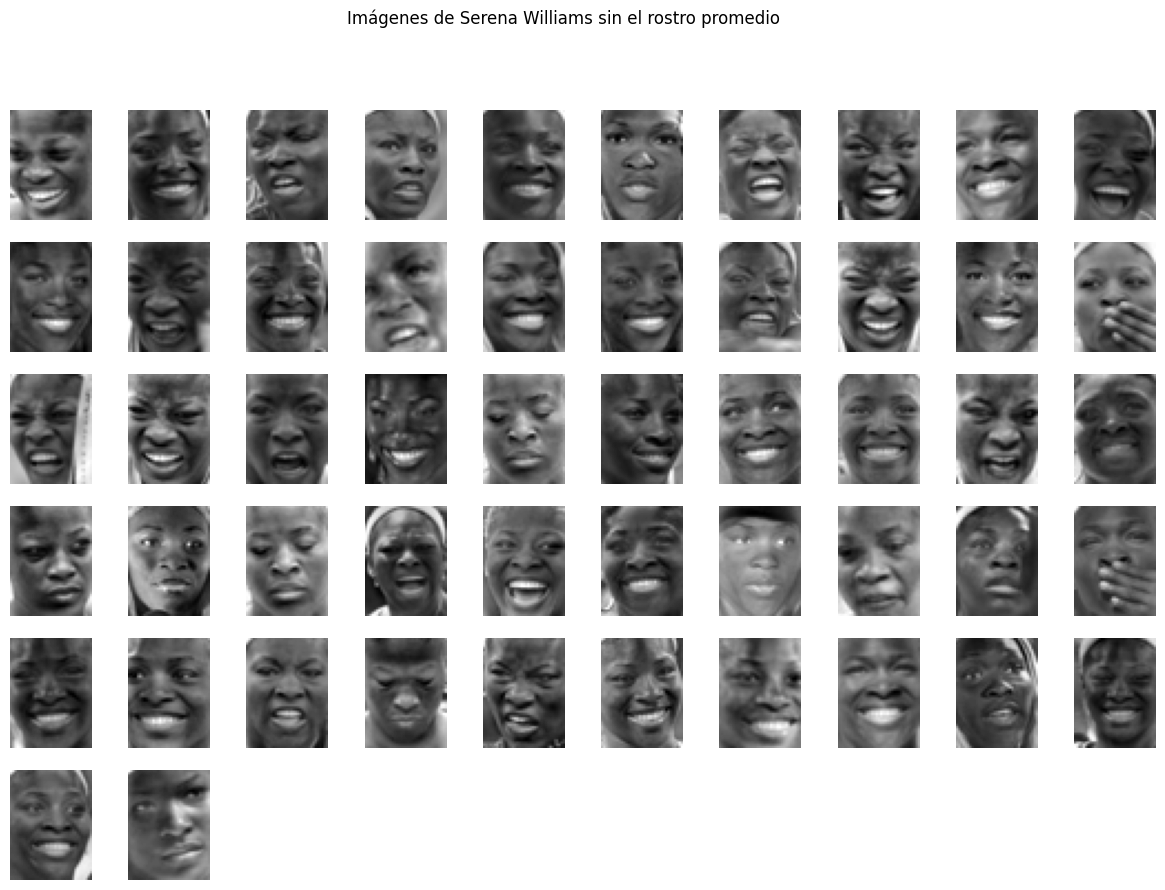

In [63]:
# Encontrar el índice de Serena Williams en el array target_names
serena_index = list(lfw_people.target_names).index("Serena Williams")

# Filtrar las imágenes que pertenecen a Serena Williams
serena_images = df[df['pid'] == serena_index].drop(columns=['pid']).to_numpy()

# Restar el rostro promedio a cada imagen de Serena Williams
serena_images_adjusted = serena_images - Xmean.to_numpy()

# Obtener las dimensiones de las imágenes
h, w = lfw_people.images.shape[1:3]

# Graficar las imágenes ajustadas de Serena Williams
num_images = serena_images_adjusted.shape[0]
num_cols = 10
num_rows = (num_images // num_cols) + int(num_images % num_cols != 0)

plt.figure(figsize=(15, 10))
for i in range(num_images):
    img = serena_images_adjusted[i].reshape(h, w)
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.suptitle('Imágenes de Serena Williams sin el rostro promedio')
plt.show()

Primero identificamos el indice correspondiente a las fotos de Serena Williams y filtramos nuestro data set para tener solo las fotos de Serena Williams. Ahora restamos el rostro promedio a las fotos de Serena Williams y graficamos las imagenes obtenidas. Estas imagenes corresponderian a las caracteristicas unicas del rostro de Serena Williams, que no son capturadas por los valores promedio de un rostro.

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [64]:
from scipy.linalg import svd #pueden explorar con sklearn
U,S,Vt = svd(X)

Se realiza la descomposicion de valores singulares calculando las matrices U, S y Vtc, las cuales capturan las caracteristicas matematicas de nuestros datos originales.

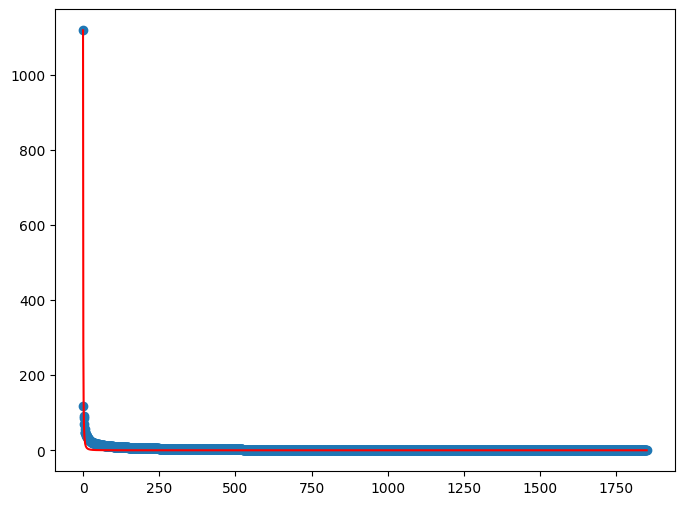

In [65]:
# observe cuan rapidamente caen los SVD
idx = range(len(S))
func = [S[0]/((i+1) ** 2) for i in idx ]

plt.figure(figsize = (8, 6))
plt.plot(idx, func, color = 'r')
plt.scatter(idx, S)

Se evidencia que facilmente menos de 30 componentes pueden explicar gran parte de la varianza de la informacion contenida en las imagenes.

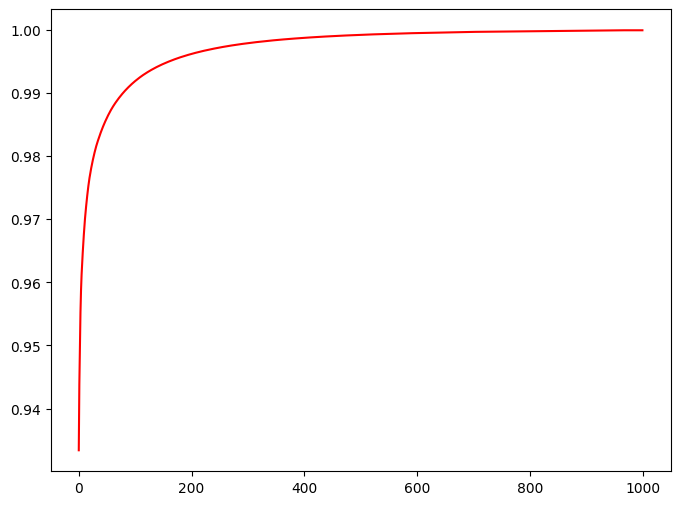

In [66]:
rg =1000
idx = range(0,rg)
var_explained = np.round(S**2/np.sum(S**2), decimals=6)

cumsum=var_explained[0:rg].cumsum()

plt.figure(figsize = (8, 6))
plt.plot(idx,cumsum , color = 'r')


In [67]:
sum(var_explained[0:rg])

np.float32(0.9999363)

Si mantenemos 1000 componentes, podemos evidenciar que se mantiene el 99.99% de la variabilidad de los datos.  

In [68]:
sum(var_explained[0:31])

np.float32(0.981276)

Si me quedo con los 30 primeros puedo evidenciar que capturo el 98% de la variabilidad de los datos. Pasamos de 1850 (50*37) dimensiones a solo 30. Sin embargo podrian buscarse reducir mas el numero de dimensiones si nuestra preocupacion fuera buscar aligerar el tamaño de las imagenes (por ejemplo para un algoritmo de compresion de imagenes). Para este caso, que no tenemos un criterio de que tan pesada puede ser cada imagen, podriamos considerar como valido caputar el 98% de la variabilidad de los datos con 30 dimensiones. Por otro lado debe validarse la calidad de la imagen, al tener solo 30 dimensiones, puesto que al ser una imagen, si no es la calidad optima esperada, puede ser necesario pensar en aumentar el numero de dimensiones a mantener.

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [69]:
n,k=X .shape

S2= np.resize(S,[n,1])*np.eye(n,k) #ponemos los valores singulares en una matriz diagonal

l = 10

reconstructed=np.dot(U[:,0:l],np.dot(S2[0:l,0:l],Vt[0:l,:]))
reconstructed = pd.DataFrame(reconstructed)
reconstructed.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
0,0.268256,0.278392,0.306840,0.344541,0.378752,0.407421,0.429297,0.449788,0.472893,0.492932,...,0.309277,0.315846,0.306758,0.285084,0.257629,0.219791,0.176573,0.144394,0.131749,0.143777
1,0.147564,0.181217,0.227959,0.262344,0.287128,0.326380,0.361086,0.391014,0.422621,0.449840,...,0.546293,0.617986,0.714522,0.811186,0.903397,0.936592,0.896593,0.819378,0.709811,0.603480


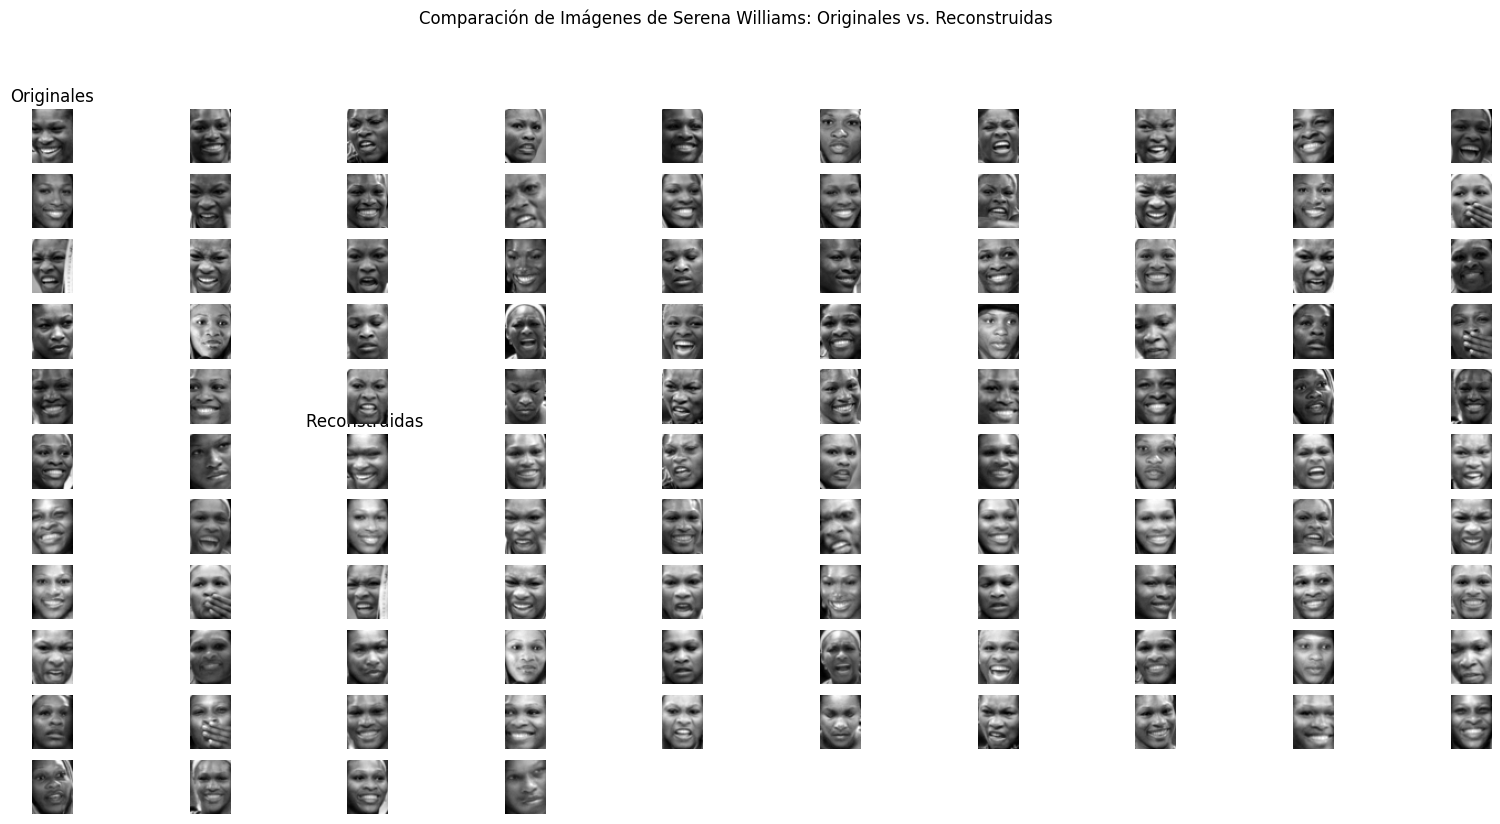

In [70]:

# Establecer el número de componentes principales a usar para la reconstrucción
k = 1000  # Puedes ajustar este valor según sea necesario

# Recortar U, S y Vt a las primeras k componentes
Uk = U[:, :k]
Sk = np.diag(S[:k])
Vtk = Vt[:k, :]

# Reconstruir las imágenes utilizando las k componentes principales
X_reconstructed = np.dot(Uk, np.dot(Sk, Vtk))

# Agregar el rostro promedio a cada imagen reconstruida
X_reconstructed += Xmean.to_numpy()

# Filtrar las imágenes de Serena Williams después de la reconstrucción
serena_images_reconstructed = X_reconstructed[df['pid'] == serena_index]

# Obtener las dimensiones de las imágenes
h, w = lfw_people.images.shape[1:3]

# Graficar las imágenes originales y las reconstruidas
num_images = serena_images.shape[0]
num_cols = 10
num_rows = (num_images // num_cols) + int(num_images % num_cols != 0)

plt.figure(figsize=(20, 10))

for i in range(num_images):
    # Imagen original
    plt.subplot(2 * num_rows, num_cols, i + 1)
    img_original = serena_images[i].reshape(h, w)
    plt.imshow(img_original, cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Originales")

    # Imagen reconstruida
    plt.subplot(2 * num_rows, num_cols, i + num_images + 1)
    img_reconstructed = serena_images_reconstructed[i].reshape(h, w)
    plt.imshow(img_reconstructed, cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title("Reconstruidas ")

plt.suptitle('Comparación de Imágenes de Serena Williams: Originales vs. Reconstruidas')
plt.show()


Primero reconstruimos la matriz original usando las  matrices U, S y Vt y realizando el producto punto entre ellas. Finalmente pasamos los datos a un dataframe, el cual tiene un total de 1859 columnas. Auqnue este dataframe no se usa inicialmente, solo comprobamos las dimenciones de la matriz resultante si se incluyeran todos los valores singulares.
Definimos el numero de valores singulraes  que vamos a usar para reconstruir las imagenes, en este caso 1000. Luego tomamos las matrices U, S y Vt y las recortamos de acuerdo al numero de componentes que vamos a utilizar, para este caso 1000, creando las matrices Uk, Sk y Vtk. Seguidamente realizamos el producto punto de estas tres matrices y asi obtenemos la matriz final con las imagenes de Serena Williams reconstruidas con base en las matrices de solo 1000 valores singulares. Finalmente adicionamos el valor del rostro promedio a las imagenes para finalizar el proceso de reconstruccion.

Como se puede observar las imagenes son reconocibles, sin embargo se logran identificar algunas diferencias con las imagenes originales. Es relevante notar que esta reconstruccion se logro unicamente con 1000 valores singulares, lo que captura un 99.99 % de la variabilidad de la informacion. Esto hace que nuestros datos tengan una menor cantidad de componentes y facilite nuestro analisis y procesamiento computacional. El poder redicir las dimensiones nos permite eliminar informacion redundate que no aporta significativamente a los datos, o que por otro lado puede estar representada por otros componentes con los que hay algun tipo de correlacion.

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [71]:

# Encontrar el índice de George W Bush en el array target_names
george_index = list(lfw_people.target_names).index("George W Bush")

# Crear una variable binaria: 1 si la imagen es de George W Bush, 0 en caso contrario
df['is_george'] = (df['pid'] == george_index).astype(int)

# Mostrar las primeras filas del DataFrame para verificar
print(df.head(3))

   pid         0         1         2         3         4         5         6  \
0   10  0.162092  0.200000  0.226144  0.309804  0.406536  0.448366  0.433987   
1    9  0.201307  0.220915  0.252288  0.281046  0.304575  0.329412  0.358170   
2   41  0.372549  0.400000  0.541176  0.633987  0.648366  0.687582  0.691503   

          7         8  ...      1841      1842      1843      1844      1845  \
0  0.435294  0.423529  ...  0.126797  0.134641  0.139869  0.151634  0.158170   
1  0.386928  0.411765  ...  0.386928  0.580392  0.848366  0.938562  0.901961   
2  0.700654  0.728105  ...  0.989542  0.989542  1.000000  0.678431  0.101961   

       1846      1847      1848      1849  is_george  
0  0.164706  0.175163  0.179085  0.186928          0  
1  0.892810  0.926797  0.864052  0.661438          1  
2  0.086275  0.090196  0.094118  0.090196          0  

[3 rows x 1852 columns]


In [72]:
count_ones = df['is_george'].sum()
print(f"Cantidad de valores que son 1 en la columna 'is_george': {count_ones}")


Cantidad de valores que son 1 en la columna 'is_george': 530


Primero identificamos el indice de George W Bush y creamos una variable binaria, llamada is_george,  usando el indice identificado y comparandolo en nuestro dataframe original Esta cmparacion va a producir una lista de verdadero y falso y con astype(int) transformamos estos valores a 0 y 1, donde 1 representa la foto que es de George W Bush. En total tenemos 530 fotos de George W Bush. 

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [73]:
from sklearn.model_selection import train_test_split

# Seleccionar características (X) y etiquetas (y)
X = df.drop(columns=['pid', 'is_george']).to_numpy()  # Características
y = df['is_george'].to_numpy()                        # Etiquetas

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% para prueba
    random_state=10101 # Semilla para reproducibilidad
)

# Verificar las dimensiones de los conjuntos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")


Dimensiones de X_train: (2070, 1850)
Dimensiones de X_test: (518, 1850)
Dimensiones de y_train: (2070,)
Dimensiones de y_test: (518,)


Se usa la libreria train_test_split para hacer la division de los datos dejando 80% para trian y 20% para prueba. Los datos se dividen en los dataframes X_train, X_test, y_train y y_test.

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [74]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Calcular el rostro promedio a partir de los datos de entrenamiento
X_train_mean = np.mean(X_train, axis=0)

# Recentrar los datos de entrenamiento y de prueba
X_train_centered = X_train - X_train_mean
X_test_centered = X_test - X_train_mean  # Usamos la media del conjunto de entrenamiento para el conjunto de prueba

# Realizar la descomposición en valores singulares (SVD)
U_train, S_train, Vt_train = np.linalg.svd(X_train_centered, full_matrices=False)
U_test, S_test, Vt_test = np.linalg.svd(X_test_centered, full_matrices=False)

# Verificar las dimensiones de las matrices resultantes
print(f"Dimensiones de U_train: {U_train.shape}")
print(f"Dimensiones de S_train: {S_train.shape}")
print(f"Dimensiones de Vt_train: {Vt_train.shape}")
print(f"Dimensiones de U_test: {U_test.shape}")
print(f"Dimensiones de S_test: {S_test.shape}")
print(f"Dimensiones de Vt_test: {Vt_test.shape}")


Dimensiones de U_train: (2070, 1850)
Dimensiones de S_train: (1850,)
Dimensiones de Vt_train: (1850, 1850)
Dimensiones de U_test: (518, 518)
Dimensiones de S_test: (518,)
Dimensiones de Vt_test: (518, 1850)


1. Reculculamos el valor del roatro promedio para poder centrar nuestros datos. Este paso de recentrar los datos se aplica tanto para los datos de entrenamiento como para los de prueba. 
2. Aplicamos SVD para los datos de entrenamiento y prueba, obteniendo las matrices correspondientes de cada conjunto de datos. Verificar Verificamos las dimensiones de las matrices resultantes para confirmar que la descomposición fue exitosa.

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [75]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Número de componentes principales a utilizar
k = 1000

# Seleccionar los primeros 1000 componentes principales de la SVD para el conjunto de entrenamiento
Uk_train = U_train[:, :k]  # (1850, 1000)
Sk_train = np.diag(S_train[:k])  # (1000, 1000)
Vtk_train = Vt_train[:k, :]  # (1000, 2070)

# Proyección de datos de entrenamiento
X_train_transformed = np.dot(X_train_centered, Vtk_train.T)  # (1850, 1000)

# Proyección de datos de prueba usando los mismos componentes principales
X_test_transformed = np.dot(X_test_centered, Vtk_train.T)  # (400, 1000)


# Entrenar el modelo de regresión logística
Modelo_Logistico = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)
Modelo_Logistico.fit(X_train_transformed, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = Modelo_Logistico.predict(X_test_transformed)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Porcentaje de imágenes de 'George W Bush' clasificadas correctamente: {accuracy * 100:.2f}%")




Porcentaje de imágenes de 'George W Bush' clasificadas correctamente: 90.73%


Iniciamos definiendo el numero de componentes a utilizar. En este caso seran 1000. Despues para el conjunto de entrenamiento seleccionamos los primeros 1000 componentes principales de nuestra SVD. Ya con las matrices U,S y Vt ajustadas al numero de componentes definidos, podemos proceder a proyectar los datos de entranamiento y test al nuevo espacio usando los componentes principales definidos. 

Una vez se tienen los datos poryectados usando los componentes principales, se procede a entrenar el modelo usando estos datos proyectados. Seguidamente se realizan las predicciones del modelo y se calcula el porcentaje de clasificaciones correctas de las imagenes de George W Bush. 

Para este caso, con 1000 componentes principales podemos clasificar correctamente 90.73% de las imahenes de George W Bush. Este es un datos relevante ya que reduciendo la dimensionalidad de los datos, logramos tener un porcentaje alto de clasificacion. Es importante considerar como este proceso de reduccion de dimensionalidad pueda afectar nuestro entendimiento de las variables que afectan el modelo. Pero en un principio, con los fines de tener predicciones buenas, podemos evidenciar que con 1000 componentes principales se logra un porcentaje alto de accuracy. 


#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


Mejor número de componentes principales: 500
Porcentaje de imágenes de 'George W Bush' clasificadas correctamente: 91.12%


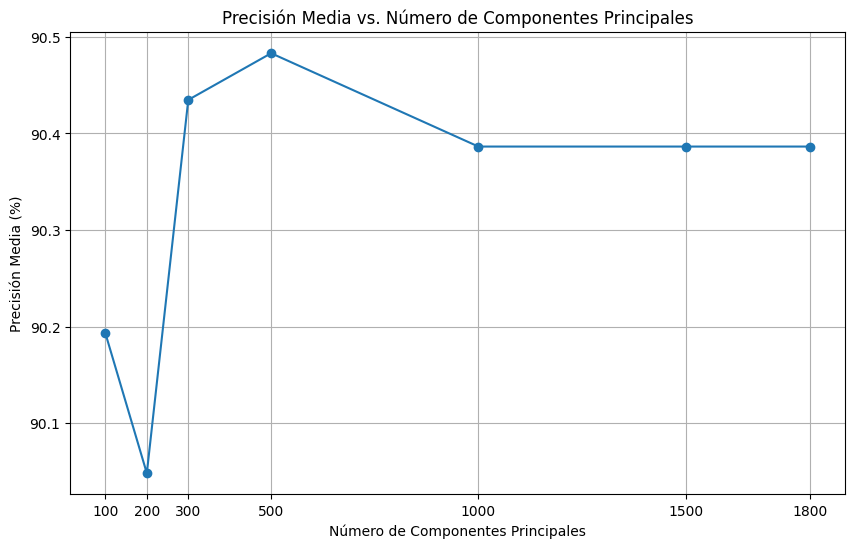

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin

# Clase para aplicar SVD manualmente como transformador
class ManualSVD(BaseEstimator, TransformerMixin):
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X, y=None):
        # Recentrar los datos
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        
        # Aplicar SVD
        self.U_, self.S_, self.Vt_ = np.linalg.svd(X_centered, full_matrices=False)
        
        # Seleccionar los primeros n_components
        self.U_ = self.U_[:, :self.n_components]
        self.S_ = np.diag(self.S_[:self.n_components])
        self.Vt_ = self.Vt_[:self.n_components, :]
        
        return self
    
    def transform(self, X):
        X_centered = X - self.mean_
        return np.dot(X_centered, self.Vt_.T)

# Definir el rango de componentes principales a explorar
k_values = [100, 200, 300, 500, 1000, 1500, 1800] 

# Crear un pipeline que primero aplica SVD y luego ajusta el modelo de regresión logística
pipeline = Pipeline([
    ('svd', ManualSVD(n_components=1000)),  # Placeholder, el valor de n_components será definido en GridSearchCV
    ('logistic', LogisticRegression(solver='sag', random_state=10101, max_iter=1000))
])

# Definir los parámetros de la búsqueda en cuadrícula
param_grid = {
    'svd__n_components': k_values
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda en cuadrícula
results = grid_search.cv_results_

# Obtener los mejores resultados
best_k = grid_search.best_params_['svd__n_components']
best_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Imprimir los mejores resultados
print(f"Mejor número de componentes principales: {best_k}")
print(f"Porcentaje de imágenes de 'George W Bush' clasificadas correctamente: {test_accuracy * 100:.2f}%")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(results['param_svd__n_components'], results['mean_test_score'] * 100, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Precisión Media (%)')
plt.title('Precisión Media vs. Número de Componentes Principales')
plt.grid(True)
plt.xticks(k_values)
plt.show()


Definimos una clase para poder realizar el SVD de forma manual, tal como se realizo en el punto 4.4 Esta clase tiene dos funcioesn que permite centrar los datos, y hacer la descomposicion de valores singulares. Definimos na pipeline que permitira realizar el calculo de SVD y despues la regresion logistica. Finalmente definimos el gridsearch para que evalue valores de K  100, 200, 300, 500, 1000, 1500 y 1800 con el fin de ver el desempeño del modelo con estos parametros.
Una vez se realizan todos los modelos con los diferentes valores de K, se obtiene el que mejor resultado genero y se realizan las predicciones sobre el ser de prueba. 
Como podemos evidenciar en la grafica, con 500 componentes principales se ligra un mejor desempeño en el modelo de regresion logistica, a pesar que en estos 500 componentes pueda haber menos varianza de los datos capturada, comparado a 1000 componentes por ejemplo. Este es uno de los puntos a reslatar, y es como usar SVD puede permitir trabajar con menores dimensiones que representen la mayoria de la variabilidad de los datos originales, y se ligre obtener resultados optimos. Sin embargo es importante considerar que fin se tiene como ejercisio, por ejemplo, si quisieramos comprimir imagenes, dejar solo 500 componentes podria causar que al reconstruir la imagen, la calidad de la imagen se afectara significativamente, sin embargo podemos ver como 500 componentes principales, para un algoritmo de degresion logistica, es un valor optimo para tener las mejores predicciones. En conclusion se debe ser critico al momento de decidir cuentos componentes principales se requiren, considerando factores como la cantidad de varianza capturada, el objetivo del ejercicio, capacidad de computo disponible, etc.

El modo en que ejecutamos este punto, comparado al numeral 4.4, nos permite de forma recursiva calcular el desempeño de nuestro modelo con diferente numero de componentes. Este enfoque es el ideal pues nos permitiria comparar cada uno de los modelos y elegir el que mejor resultado nos entregue. Sin embargo esta busqueda puede tornarse compleja a medida que la cantidad de datos aumenta y la capacidad de procesamiento con la que contamos se ve limitada. Si nuestro set de datos y capacidad de computo nos lo permite, el enfoque de gridsearch nos permitira encontrar un valor optimo para trabajar con menos dimensiones de las originales usando SVD. Sin embargo si el proceso se torna complejo, se debe buscar un enfoque mas practico, definiendo por ejemplo valores de varianza explicada que se aceptara, o el nivel de desempeño bajo el cual funcionaria bien nuestro algoritmo.

Como conclusion podemos indicar que SVD es una tecnica poderosa para trabajar fuentes de datos con gran numero de variables permitiendo su reduccion, y que por otro lado, nos permite tener datos que capturen la mayor varianza posible, eliminando redundancia o correlaciones que puedan no aportar a nuestro ejercicio de analisis. EEs igualmente importante considerar el efecto que las medidas de los datos tiene en este tipo de tecnicas, pues si no estandarizamos los datos, corremos el riesgo que una variable con una dimension de datos mayor, afecte nuestros calculos de SVD.